    MOVIE RECOMMENDATION ENGINE

    Objective: 
        * Given a user 'x' and an unrated movie 'y', can we predict how the user will rate this movie?
        * Using the rating, can we recommend similar movies?

    Data:
        * Movie dataset (details about the movie)
        * Ratings dataset (movie ratings)

In [1]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
from surprise import Reader, Dataset # reading and dataset into surprise

%matplotlib inline

In [2]:
# Import Dataset
movie_ratings = pd.read_csv("movie_ratings_features.csv")
movie_ratings.head()

,movieId,title,genres,userId,rating,global_avg_rating,movie_avg_rating,user_avg_rating,sim_movie_1,sim_movie_2,sim_movie_3,sim_movie_4,sim_movie_5,sim_user_1,sim_user_2,sim_user_3,sim_user_4,sim_user_5
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,3.501557,3.920930,4.366379,4.0,4.0,3.0,4.0,4.0,5.0,3.0,4.0,3.0,3.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,3.501557,3.920930,4.366379,4.0,4.0,3.0,4.0,4.0,5.0,3.0,4.0,3.0,3.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,3.501557,3.259615,4.366379,3.0,2.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,3.0
3,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,3.501557,3.259615,4.366379,3.0,2.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,3.0
4,6,Heat (1995),Action|Crime|Thriller,1,4.0,3.501557,3.946078,4.366379,4.0,4.0,4.0,4.0,4.0,5.0,3.0,4.0,3.0,3.0


In [3]:
# Drop "title", "genres", "movieId", and "userId"
movie_ratings.drop(labels=['title', 'genres', 'movieId', 'userId'], axis=1, inplace=True)

In [4]:
# Missing entries
movie_ratings.isna().sum()

rating               0
global_avg_rating    0
movie_avg_rating     0
user_avg_rating      0
sim_movie_1          0
sim_movie_2          0
sim_movie_3          0
sim_movie_4          0
sim_movie_5          0
sim_user_1           0
sim_user_2           0
sim_user_3           0
sim_user_4           0
sim_user_5           0
dtype: int64

In [5]:
# Summary Stats
movie_ratings.describe()

,rating,global_avg_rating,movie_avg_rating,user_avg_rating,sim_movie_1,sim_movie_2,sim_movie_3,sim_movie_4,sim_movie_5,sim_user_1,sim_user_2,sim_user_3,sim_user_4,sim_user_5
count,201660.000000,2.016600e+05,201660.000000,201660.000000,201660.000000,201660.000000,201660.000000,201660.000000,201660.000000,201660.000000,201660.000000,201660.000000,201660.000000,201660.000000
mean,3.501567,3.501557e+00,3.501567,3.501568,3.494739,3.466235,3.468214,3.459020,3.459942,3.481137,3.504939,3.511524,3.528136,3.475483
std,1.042546,8.937318e-12,0.564959,0.461694,0.662640,0.693876,0.701689,0.690533,0.679804,0.667666,0.665892,0.623058,0.635271,0.584784
min,0.500000,3.501557e+00,0.500000,1.275000,0.000000,0.500000,0.000000,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.501557e+00,3.184713,3.258520,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.500000,3.501557e+00,3.576087,3.508850,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
75%,4.000000,3.501557e+00,3.916667,3.803226,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,3.501557e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


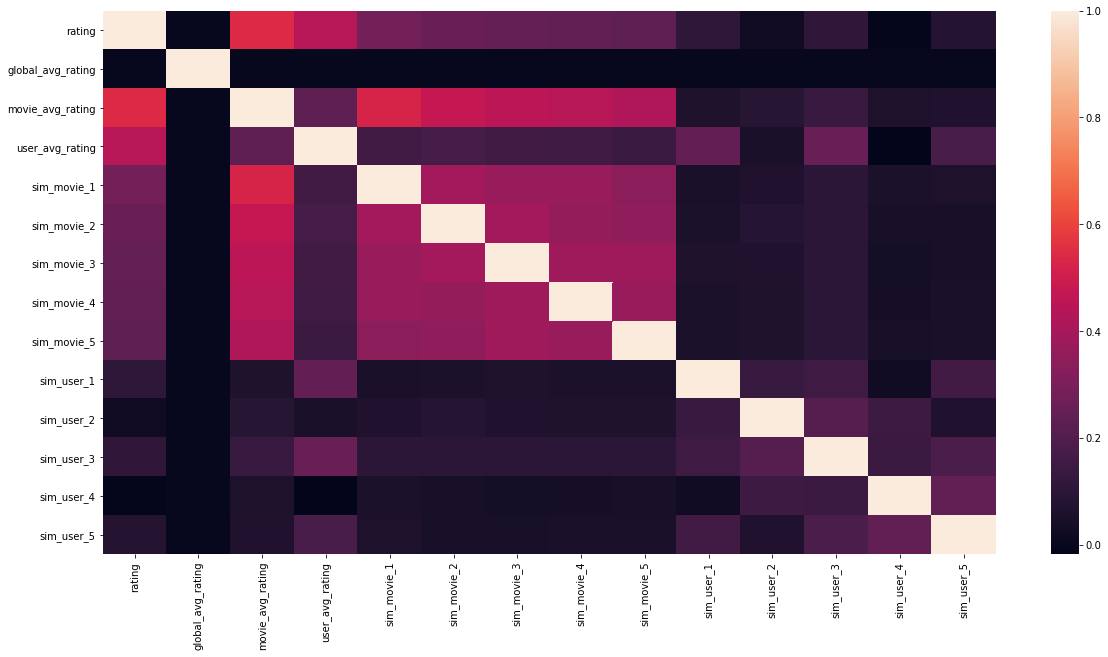

In [6]:
# Figure Size
plt.figure(figsize=(20,10))

# Correlation
correlation = movie_ratings.corr()
sns.heatmap(correlation, xticklabels=movie_ratings.columns, yticklabels=movie_ratings.columns)

    MODEL DEVELOPMENT

In [7]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [8]:
# Features
X = movie_ratings.drop('rating', axis=1).values
y = movie_ratings['rating'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

    # Linear Regression Model

In [9]:
def LinearRegressionModel():
    # Instantiate model
    reg = LinearRegression()
    # Fit the data
    reg.fit(X_train, y_train)
    # Make prediction
    
    score = reg.score(X_test, y_test)
    print("Linear Regression Score: {}".format(score))

In [10]:
LinearRegressionModel()

Linear Regression Score: 0.4060418335840802


    # SDG Regressor

In [11]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [12]:
def SGD_Regressor():
    # Pipeline
    reg = make_pipeline(StandardScaler(), SGDRegressor())
    # Fit the data
    reg.fit(X_train, y_train)
    # Score
    score = reg.score(X_test, y_test)
    
    print("SGD Regressor Score: {}".format(score))

In [13]:
SGD_Regressor()

SGD Regressor Score: 0.40466648431245544


    # xgboost 

In [14]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [15]:
def xgboost_model():
    # Matrix format for xgboost
    data_dmatrix = xgb.DMatrix(data=X, label=y)
    # Instantiate model
    xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
    # Fit the data
    xgb_reg.fit(X_train, y_train)
    
    # ------ Test -------
    
    # Test Predict
    preds_test = xgb_reg.predict(X_test)
    # Test RMSE
    rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
    
    # ----- Train -------
    
    # Train Predict
    preds_train = xgb_reg.predict(X_train)
    # Train RMSE
    rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
    
    print("RMSE Test: %f" % (rmse_test))
    print("RMSE Train: %f" % (rmse_train))

In [16]:
xgboost_model()

RMSE Test: 1.406380
RMSE Train: 1.402370


    # Deep Learning Model

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
# Define the model
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dropout(0.3, seed=2),
    layers.Dense(10, activation='swish'),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='swish'),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='swish'),
    layers.Dense(1)
])

# Compile the model
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=optimizer,
              metrics=['mae'])

# fit the keras model on the dataset
history = model.fit(
    x=X_train, y=y_train,
    epochs=70, validation_split=0.2
)

Epoch 1/70
4034/4034 [==============================] - 7s 2ms/step - loss: 0.9475 - mae: 0.7423 - val_loss: 2.5338 - val_mae: 1.4290
Epoch 2/70
4034/4034 [==============================] - 7s 2ms/step - loss: 0.7216 - mae: 0.6526 - val_loss: 2.2206 - val_mae: 1.3305
Epoch 3/70
4034/4034 [==============================] - 8s 2ms/step - loss: 0.6917 - mae: 0.6371 - val_loss: 2.0181 - val_mae: 1.2612
Epoch 4/70
4034/4034 [==============================] - 8s 2ms/step - loss: 0.6815 - mae: 0.6309 - val_loss: 2.5811 - val_mae: 1.4484
Epoch 5/70
4034/4034 [==============================] - 8s 2ms/step - loss: 0.6750 - mae: 0.6273 - val_loss: 2.2433 - val_mae: 1.3395
Epoch 6/70
4034/4034 [==============================] - 9s 2ms/step - loss: 0.6740 - mae: 0.6264 - val_loss: 1.8939 - val_mae: 1.2168
Epoch 7/70
4034/4034 [==============================] - 8s 2ms/step - loss: 0.6713 - mae: 0.6247 - val_loss: 2.4048 - val_mae: 1.3926
Epoch 8/70
4034/4034 [==============================] - 10s 2m

4034/4034 [==============================] - 8s 2ms/step - loss: 0.6638 - mae: 0.6202 - val_loss: 1.9967 - val_mae: 1.2523
Epoch 62/70
4034/4034 [==============================] - 10s 3ms/step - loss: 0.6652 - mae: 0.6211 - val_loss: 1.5837 - val_mae: 1.0969
Epoch 63/70
4034/4034 [==============================] - 14s 3ms/step - loss: 0.6642 - mae: 0.6206 - val_loss: 1.8801 - val_mae: 1.2109
Epoch 64/70
4034/4034 [==============================] - 15s 4ms/step - loss: 0.6655 - mae: 0.6212 - val_loss: 1.7919 - val_mae: 1.1781
Epoch 65/70
4034/4034 [==============================] - 16s 4ms/step - loss: 0.6649 - mae: 0.6204 - val_loss: 1.8126 - val_mae: 1.1857
Epoch 66/70
4034/4034 [==============================] - 11s 3ms/step - loss: 0.6649 - mae: 0.6210 - val_loss: 1.9305 - val_mae: 1.2292
Epoch 67/70
4034/4034 [==============================] - 12s 3ms/step - loss: 0.6648 - mae: 0.6210 - val_loss: 2.1120 - val_mae: 1.2935
Epoch 68/70
4034/4034 [==============================] - 15s 

In [23]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print('MAE = {:.2f}'.format(mae))

MAE = 1.11


    On average, the model predicts a rating of 1.11 either above or below the actual rating of a movie.